In [1]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
from datetime import date
import pandas as pd

#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from pandas import DataFrame
import numpy as np 
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
#from imblearn import *

#from imblearn.over_sampling import SMOTE, ADASYN
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns
import random 
import warnings
import operator
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

import scipy as sp

import copy

import sys

In [76]:
rawdata = pd.read_csv("train.csv")

In [77]:
target = rawdata.groupby("PlayId")["Yards"].aggregate("mean")
#del rawdata["Yards"]

# 1. EDA

### 1) 기초 기술통계

In [9]:
#(1) 컬럼명 탐색

rawdata.columns

Index(['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation', 'Dir', 'NflId', 'DisplayName', 'JerseyNumber', 'Season', 'YardLine', 'Quarter', 'GameClock', 'PossessionTeam', 'Down', 'Distance', 'FieldPosition', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay', 'NflIdRusher', 'OffenseFormation', 'OffensePersonnel', 'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'TimeHandoff', 'TimeSnap', 'PlayerHeight', 'PlayerWeight', 'PlayerBirthDate', 'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr', 'Week', 'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather', 'Temperature', 'Humidity', 'WindSpeed', 'WindDirection'], dtype='object')

In [8]:
# (2) 데이터 구조

rawdata.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,496723,Eric Berry,29,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,6-0,212,12/29/1988,Tennessee,SS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,2495116,Allen Bailey,97,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,6-3,288,03/25/1989,Miami,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,2495493,Justin Houston,50,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,6-3,270,01/21/1989,Georgia,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,2506353,Derrick Johnson,56,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,6-3,245,11/22/1982,Texas,ILB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,2530794,Ron Parker,38,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,6-0,206,08/17/1987,Newberry,FS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


In [12]:
# (3) 연속형 변수들의 summary
# 표준편차, max값을 확인해볼 때 극단적인 이상치는 없는 것으로 추정된다.

rawdata.iloc[:,2:].describe()

,X,Y,S,A,Dis,Orientation,Dir,NflId,JerseyNumber,Season,YardLine,Quarter,Down,Distance,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,DefendersInTheBox,PlayerWeight,Week,Temperature,Humidity
count,509762.000000,509762.000000,509762.000000,509762.000000,509762.000000,509744.000000,509748.000000,5.097620e+05,509762.000000,509762.000000,509762.000000,509762.000000,509762.000000,509762.000000,509762.000000,509762.000000,5.097620e+05,509696.000000,509762.000000,509762.000000,461230.000000,503602.000000
mean,60.040304,26.783535,2.591912,1.683176,0.279406,180.247779,179.933859,2.344703e+06,54.187982,2017.486427,28.368737,2.504639,1.520651,8.329248,11.148073,9.501057,2.419204e+06,6.943025,253.554388,9.096370,60.436442,55.646062
std,25.435261,7.238206,1.383601,0.976412,0.145482,104.298330,106.319488,6.418871e+05,28.379359,0.499816,13.010918,1.144105,0.674987,3.795208,10.277098,9.366413,5.357783e+05,0.991130,48.367386,5.000984,17.570291,25.430976
min,0.660000,1.850000,0.000000,0.000000,0.000000,0.000000,0.000000,2.220000e+02,1.000000,2017.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.340000e+02,1.000000,153.000000,1.000000,9.000000,0.000000
25%,39.090000,22.730000,1.500000,0.940000,0.170000,90.630000,89.830000,2.532865e+06,26.000000,2017.000000,20.000000,1.000000,1.000000,6.000000,3.000000,0.000000,2.540011e+06,6.000000,210.000000,5.000000,48.000000,43.000000
50%,60.290000,26.790000,2.470000,1.540000,0.270000,179.700000,180.090000,2.543765e+06,56.000000,2017.000000,29.000000,3.000000,1.000000,10.000000,9.000000,7.000000,2.552582e+06,7.000000,245.000000,9.000000,62.000000,59.000000
75%,80.970000,30.860000,3.560000,2.290000,0.390000,270.400000,270.190000,2.555343e+06,78.000000,2018.000000,39.000000,4.000000,2.000000,10.000000,17.000000,14.000000,2.557976e+06,8.000000,305.000000,14.000000,73.000000,71.000000
max,116.840000,56.450000,9.410000,14.710000,1.390000,360.000000,360.000000,2.561671e+06,99.000000,2018.000000,50.000000,5.000000,4.000000,40.000000,57.000000,51.000000,2.561468e+06,11.000000,380.000000,17.000000,97.000000,100.000000


(array([8.5800e+02, 1.9151e+04, 2.5630e+03, 4.0800e+02, 9.3000e+01,
       4.6000e+01, 2.3000e+01, 2.1000e+01, 3.0000e+00, 5.0000e+00]), array([-14. ,  -2.7,   8.6,  19.9,  31.2,  42.5,  53.8,  65.1,  76.4,
        87.7,  99. ]), <a list of 10 Patch objects>)
23171


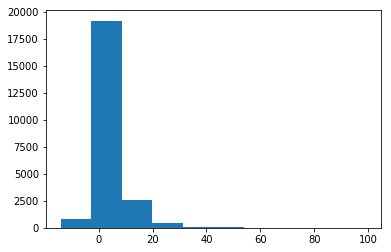

In [11]:
# (4)타겟변수 분포

print(plt.hist(target))
print(target.count())

### (5) 선수별 분석 VS 팀별 분석? 데이터 구조는 어떤식으로 되어있나?

In [10]:
# 한번의 플레이당(즉 동일 PlayID)당 22개의 선수들이 하나로 묶여서 경기를 진행
# 즉, 분석을 위해선 22개 행의 단위로 GROUP을 지어서 분석을 실시할 필요가 있음

rawdata[rawdata["PlayId"] == rawdata["PlayId"][0]][["GameId","PlayId","Team","DisplayName","TimeHandoff","Position"]]

,GameId,PlayId,Team,DisplayName,TimeHandoff,Position
0,2017090700,20170907000118,away,Eric Berry,2017-09-08T00:44:06.000Z,SS
1,2017090700,20170907000118,away,Allen Bailey,2017-09-08T00:44:06.000Z,DE
2,2017090700,20170907000118,away,Justin Houston,2017-09-08T00:44:06.000Z,DE
3,2017090700,20170907000118,away,Derrick Johnson,2017-09-08T00:44:06.000Z,ILB
4,2017090700,20170907000118,away,Ron Parker,2017-09-08T00:44:06.000Z,FS
5,2017090700,20170907000118,away,Dee Ford,2017-09-08T00:44:06.000Z,DE
6,2017090700,20170907000118,away,Terrance Mitchell,2017-09-08T00:44:06.000Z,CB
7,2017090700,20170907000118,away,Phillip Gaines,2017-09-08T00:44:06.000Z,CB
8,2017090700,20170907000118,away,Daniel Sorensen,2017-09-08T00:44:06.000Z,SS
9,2017090700,20170907000118,away,Marcus Peters,2017-09-08T00:44:06.000Z,CB


### 2) 이상치 탐색

### (1) 박스플롯 : 3IQR을 넘어가는 이상치의 갯수. 컴퓨팅 파워상 박스플롯을 그릴 수 없으므로 대안적으로 데이터프레임으로 정리

In [16]:
# (1) 1Q - 1.5IQR인 하한 초과

(rawdata.loc[:,(rawdata.dtypes != "object").values] < lower_bound).aggregate(lambda x : x.value_counts(),axis="index")

,GameId,PlayId,X,Y,S,A,Dis,Orientation,Dir,NflId,JerseyNumber,Season,YardLine,Quarter,Down,Distance,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,DefendersInTheBox,PlayerWeight,Week,Temperature,Humidity
False,509762.0,509762.0,509762.0,495044,509762.0,509762.0,509762.0,509762.0,509762.0,428376,509762.0,509762.0,509762.0,509762.0,509762.0,509762.0,509762.0,509762.0,420310,509718,509762.0,509762.0,507496,464508
True,NaN,NaN,NaN,14718,NaN,NaN,NaN,NaN,NaN,81386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89452,44,NaN,NaN,2266,45254


In [19]:
# (2) 3Q + 1.5IQR인 상한 초과

(rawdata.loc[:,(rawdata.dtypes != "object").values] > upper_bound).aggregate(lambda x : x.value_counts(),axis="index")

,GameId,PlayId,X,Y,S,A,Dis,Orientation,Dir,NflId,JerseyNumber,Season,YardLine,Quarter,Down,Distance,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,DefendersInTheBox,PlayerWeight,Week,Temperature,Humidity
False,509762.0,509762.0,509762.0,495625,507290,504107,508233,509762.0,509762.0,509762.0,509762.0,509762.0,509762.0,509762.0,505560,498828,502304,502920,509762.0,509762.0,509762.0,509762.0,509762.0,509762.0
True,NaN,NaN,NaN,14137,2472,5655,1529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4202,10934,7458,6842,NaN,NaN,NaN,NaN,NaN,NaN


### (2) 결측치

In [156]:
print ("결측치 표시기")
missmap = rawdata.isnull().sum().to_frame().sort_values(0, ascending = False)
missmap[missmap[0] != 0]

결측치 표시기


,0
WindDirection,80234
WindSpeed,67430
Temperature,48532
GameWeather,43648
StadiumType,32934
FieldPosition,6424
Humidity,6160
OffenseFormation,110
DefendersInTheBox,66
Orientation,18


### 과연 결측치들은 어느 변수와 가장 큰 연관성을 갖고 있을까?

## - 바람 방향(WindDirection)

In [27]:
rawdata.columns

Index(['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation', 'Dir', 'NflId', 'DisplayName', 'JerseyNumber', 'Season', 'YardLine', 'Quarter', 'GameClock', 'PossessionTeam', 'Down', 'Distance', 'FieldPosition', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay', 'NflIdRusher', 'OffenseFormation', 'OffensePersonnel', 'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'TimeHandoff', 'TimeSnap', 'PlayerHeight', 'PlayerWeight', 'PlayerBirthDate', 'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr', 'Week', 'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather', 'Temperature', 'Humidity', 'WindSpeed', 'WindDirection'], dtype='object')

In [37]:
temp = rawdata.groupby("HomeTeamAbbr")["WindDirection"]
nan_compromised = temp.value_counts(dropna=False).unstack().iloc[:,0].isnull() == False
nan_compromised = nan_compromised[nan_compromised]
temp.unique()[nan_compromised.index]

# 각 홈팀 이름별로 nan값만 발생하는 경우가 있다. 이들의 홈구장의 환경과 연관이 있는걸까?

HomeTeamAbbr
ARI                                  [nan, NE, SE, N, W]
ATL                                [NW, nan, ESE, E, SW]
CLE           [East, SE, West, South, N, SW, nan, North]
DAL                   [nan, North, North/Northwest, SSE]
DEN    [SouthWest, E, NorthEast, North, Northeast, So...
DET                                                [nan]
KC     [Northeast, South Southeast, Northwest, South ...
LA                    [SW, nan, W, North, ESE, NNW, WSW]
MIN                                                [nan]
NE           [SW, NE, N, SE, WNW, North, West, SSW, nan]
NYJ     [NE, NNE, WNW, East, South, NW, nan, N, SW, NNW]
SF     [Northwest, West-Southwest, NW, West, Southeas...
WAS    [North, nan, South, ESE, NE, ENE, WNW, East, S...
Name: WindDirection, dtype: object

In [38]:
temp = rawdata.groupby("VisitorTeamAbbr")["WindDirection"]
nan_compromised = temp.value_counts(dropna=False).unstack().iloc[:,0].isnull() == False
nan_compromised = nan_compromised[nan_compromised]
temp.unique()[nan_compromised.index]

# 원정팀과 바람의 결측값과는 상관이 없다.

VisitorTeamAbbr
ARI     [nan, SSW, W, NW, North, South, N, SW, N-NE, SE]
ATL    [SE, nan, NE, East, ENE, E, NNE, WNW, NNW, Fro...
BAL    [SE, WNW, nan, WSW, W-NW, From SW, N, S, North...
BUF    [North, nan, SSE, South, W, South Southwest, N...
CAR    [Northwest, N, nan, S, NNW, NW, NE, From NNE, ...
CHI              [NE, SW, s, N, NW, SSW, nan, E, 8, NNW]
CIN    [S, SE, From S, NNE, SSW, North, nan, NW, NE, ...
CLE    [ESE, ENE, N, nan, E, WSW, WNW, From W, NW, W,...
DAL    [SouthWest, nan, NW, ESE, West, NNW, East Nort...
DET       [ENE, nan, SE, SW, WNW, N, S, NW, SSW, W, NNE]
GB     [NW, nan, WSW, From WSW, SW, SSW, NE, West, So...
HOU    [ENE, NE, nan, Southeast, East, SE, NW, SW, So...
JAX    [NNE, From SW, S, West, nan, Northeast, NE, WS...
KC     [SW, W, NW, nan, WNW, NorthEast, From ESE, Nor...
LA     [West-Southwest, nan, NE, ENE, S, WSW, SSE, No...
LAC    [SouthWest, WSW, NNE, SE, NE, nan, South, N, S...
MIA    [W, NE, nan, West, NNE, WNW, NW, East, S, NNW,...
MIN    [From S,

In [41]:
temp = rawdata.groupby("Turf")["WindDirection"]
nan_compromised = temp.value_counts(dropna=False).unstack().iloc[:,0].isnull() == False
nan_compromised = nan_compromised[nan_compromised]
temp.unique()[nan_compromised.index]

# 아니 이건 또 왜 같은 잔디종류를 여러개로 나누고 그래

Turf
Artificial       [NNE, nan, SSW, ENE, N, ESE, NW, S, NE, WSW, N...
Field Turf             [SW, nan, NE, N, SE, WNW, North, West, SSW]
Field turf                                                   [nan]
FieldTurf        [S, NE, NNE, NNW, WNW, East, ENE, South, E, NW...
FieldTurf 360                                            [NW, nan]
FieldTurf360                                     [nan, ESE, E, SW]
Grass            [SE, East, NE, North, SW, SouthWest, NW, From ...
Natural Grass    [Northwest, ESE, North, Northeast, NE, South, ...
Natural grass                         [West-Southwest, NW, N, nan]
natural grass                                                [nan]
Name: WindDirection, dtype: object

In [36]:
temp = rawdata.groupby("FieldPosition")["WindDirection"]
nan_compromised = temp.value_counts(dropna=False).unstack().iloc[:,0].isnull() == False
nan_compromised = nan_compromised[nan_compromised]
temp.unique()[nan_compromised.index]

# 필드포지션과는 상관이 없다.

FieldPosition
ARZ    [nan, SSW, W, NW, North, NE, South, SE, N, SW,...
ATL    [SE, NW, nan, NE, East, ENE, E, NNE, WNW, NNW,...
BLT    [SE, ESE, North, WNW, s, nan, West, WSW, W-NW,...
BUF    [NNE, North, W, nan, SSE, s, NE, South, WSW, S...
CAR    [Northwest, North, NNE, N, nan, ENE, S, NNW, N...
CHI    [SE, NE, S, SW, s, N, WSW, WNW, NW, SSW, nan, ...
CIN    [SE, ENE, S, SSE, From S, NNW, NNE, SSW, North...
CLV    [East, ESE, ENE, SE, West, N, South, nan, E, W...
DAL    [nan, SouthWest, NW, ESE, North, West, NNW, Ea...
DEN    [SouthWest, W, E, NorthEast, Northwest, SE, No...
DET       [nan, ENE, SE, SW, WNW, N, S, NW, SSW, W, NNE]
GB     [S, NW, SW, nan, W, WSW, W-NW, From WSW, SE, S...
HST    [NNE, ENE, NE, N, NW, SSW, nan, North, Southea...
JAX    [NNE, NW, SE, From SW, NE, S, West, nan, North...
KC     [SW, Northeast, W, South Southeast, NW, Northw...
LA     [SW, West-Southwest, nan, NE, W, ENE, North, S...
LAC    [SouthWest, W, S, WSW, NNE, SE, NE, nan, NNW, ...
MIA    [W, NE, 13

In [18]:
temp = rawdata.groupby("GameWeather")["WindDirection"]
nan_compromised = temp.value_counts(dropna=False).unstack().iloc[:,0].isnull() == False
nan_compromised = nan_compromised[nan_compromised]
temp.unique()[nan_compromised.index]

## 구름이 끼거나, 실내 경기장인 경우 바람 방향은 결측치이다.

GameWeather
Clear                         [Northwest, NE, NW, nan, NNW, South Southeast,...
Clear skies                                              [nan, North/Northwest]
Cloudy                        [Northeast, W, SW, ENE, E, West, ESE, WSW, Fro...
Controlled Climate                                                        [nan]
Hazy                                                               [S, NE, nan]
Indoor                                                                    [nan]
Indoors                                                      [nan, E, WNW, ESE]
N/A (Indoors)                                                             [nan]
N/A Indoor                                                                [nan]
Partly Cloudy                 [NW, SouthWest, ESE, N, SSE, West, SW, NorthEa...
Sunny                         [SE, East, NNE, NE, North, SW, From S, South, ...
T: 51; H: 55; W: NW 10 mph                                                [nan]
Name: WindDirection, dtype: 

In [19]:
temp = rawdata.groupby("StadiumType")["WindDirection"]
nan_compromised = temp.value_counts(dropna=False).unstack().iloc[:,0].isnull() == False
nan_compromised = nan_compromised[nan_compromised]
temp.unique()[nan_compromised.index]

# 마찬가지로 실내돔인 경우 바람방향은 결측치이다.

StadiumType
Closed Dome                                                           [nan]
Dome                                                 [nan, NE, SE, N, E, W]
Dome, closed                                                          [nan]
Domed, Open                                                           [nan]
Domed, closed                                                         [nan]
Indoor                                          [nan, North/Northwest, SSE]
Indoor, Roof Closed                                                   [nan]
Indoors                          [nan, NNE, SE, N, SW, NE, WSW, WNW, NW, E]
Outdoor                   [SW, SE, East, S, Northwest, SouthWest, ENE, E...
Outdoor Retr Roof-Open                                                [nan]
Outdoors                  [NNE, NE, North, From S, SE, W, From SW, ENE, ...
Outside                                                               [nan]
Name: WindDirection, dtype: object

In [20]:
temp = rawdata.groupby("WindSpeed")["WindDirection"]
nan_compromised = temp.value_counts(dropna=False).unstack().iloc[:,0].isnull() == False
nan_compromised = nan_compromised[nan_compromised]
temp.unique()[nan_compromised.index]

# calm이거나 0인경우에 바람 방향은 결측치이다.

WindSpeed
0.0                                        [nan, SSE, SE]
1                                       [From S, SW, nan]
5.0     [North, SouthWest, ENE, NNE, East, SE, NE, Wes...
0                                                [nan, N]
Calm                                                [nan]
Name: WindDirection, dtype: object

### - StadiumType 결측값

In [61]:
temp = rawdata.groupby("Stadium")["StadiumType"]
nan_compromised = temp.value_counts(dropna=False).unstack().iloc[:,0].isnull() == False
nan_compromised = nan_compromised[nan_compromised]
temp.unique()[nan_compromised.index]

# StubHub Center는 스타디움 유형이 결측처리 되어있다.

Stadium
MetLife Stadium              [nan, Outdoor, Outdoors]
StubHub Center                                  [nan]
TIAA Bank Field    [Open, Outdoor, nan, Cloudy, Bowl]
Name: StadiumType, dtype: object

In [63]:
temp = rawdata.groupby("HomeTeamAbbr")["StadiumType"]
nan_compromised = temp.value_counts(dropna=False).unstack().iloc[:,0].isnull() == False
nan_compromised = nan_compromised[nan_compromised]
temp.unique()[nan_compromised.index]

# 홈팀 중 NYG는 nan값밖엔 없다.

HomeTeamAbbr
JAX    [Open, Outdoors, Outdoor, nan, Cloudy, Bowl]
LAC                                 [nan, Outdoors]
NYG                                           [nan]
Name: StadiumType, dtype: object

## 3)진행 Yard의 시계열성 여부 판단

In [145]:
rawdata_temp = rawdata.copy()

In [149]:
# (1) Play 기준으로, 매 22개 행이 동일한 Yards를 공유한다. 따라서, 각 PlayId의 맨 처음 행에만 Yard를 저장하는 Series를 만든다.

temp = rawdata_temp.groupby("PlayId")["Yards"].apply(lambda x : x.index[0])

# (2) 맨 처음 행의 Yard만 해당 값을 집어넣고, 나머지 21개 행은 NaN으로 처리하는 새로운 열을 만든다.

rawdata_temp.loc[temp.values,"Yards_unique"] = rawdata.loc[temp.values,"Yards"].copy()

# (3)이번엔 Play 기준이 아닌 Game 기준으로 묶어서, 각 Play가 Game의 몇 번째 경기인지 알려주는 열을 만든다. 이를 이용하여 피보팅한다.

rawdata_temp.loc[:,"GameId_count"] = rawdata_temp.groupby("GameId")["PlayId"].cumcount()

# (4)인덱스를 GameId로, 그 인덱스에 해당하는 시계열인 "Play"를 열로, 그 값은 아까 첫 번재 값을 제외한 21개 행은 NaN인 Yards_unique를
# 적용한다.

temp = rawdata_temp.pivot_table(index = ["GameId"], columns = ["GameId_count"],values=["Yards_unique"])

In [152]:
temp.head()

Yards_unique                                                                                                                                                                                                                                                                                                                                                                                                                                                         
GameId_count         0     22   44   66    88    110  132   154   176   198  220   242   264   286  308  330  352  374   396   418   440  462  484  506  528  550  572   594  616   638  660  682   704  726   748  770  792  814  836  858  880   902  924  946   968   990  1012  1034  1056 1078 1100 1122 1144 1166 1188 1210 1232 1254 1276 1298 1320 1342 1364 1386 1408 1430 1452 1474 1496 1518 1540 1562 1584 1606 1628 1650 1672 1694 1716 1738 1760 1782 1804 1826 1848
GameId                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
2017090700            8.0   3.0  5.0  2.0   7.0  10.0 -1.0   0.0   9.0   9.0  2.0   3.0  13.0   4.0  0.0  4.0  4.0  4.0   0.0  16.0   9.0  4.0  2.0  2.0  3.0  1.0  4.0   4.0  7.0  10.0  2.0 -4.0   4.0  5.0   1.0  0.0  1.0  1.0  7.0  4.0 -6.0  13.0  0.0  2.0  14.0   7.0  4.0  58.0  21.0  2.0  2.0  3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2017091000            3.0  16.0  4.0  3.0  10.0  -6.0  3.0  -1.0   1.0  23.0  0.0  14.0   2.0  20.0 -1.0  3.0  4.0  3.0   2.0   0.0   1.0  1.0  0.0  0.0  2.0  8.0  1.0   8.0  1.0  27.0  0.0  3.0   1.0  1.0  11.0  4.0  2.0 -1.0  5.0 -3.0  2.0   1.0  3.0  0.0   NaN   NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2017091001            6.0   3.0  5.0  2.0  -1.0   1.0  4.0  11.0  15.0   2.0  5.0   0.0   1.0   1.0  3.0  7.0  5.0  3.0  46.0   4.0   2.0  5.0  6.0  9.0  7.0  2.0  0.0   5.0  1.0   1.0  6.0  0.0   6.0 -3.0   3.0  2.0 -1.0  0.0  NaN  NaN  NaN   NaN  NaN  NaN   NaN   NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2017091002           12.0   1.0 -1.0  7.0   1.0   0.0  4.0   1.0   8.0   1.0  4.0   2.0  23.0   3.0  1.0  1.0  2.0  4.0   7.0   1.0  10.0  4.0  1.0  4.0  2.0  5.0  7.0  17.0  2.0   3.0  2.0  7.0   2.0  7.0   6.0  3.0  2.0  2.0  4.0  6.0  0.0   4.0  7.0  1.0   3.0  11.0  2.0  -3.0   4.0  1.0  4.0  8.0 -2.0 -1.0  2.0  8.0  3.0  4.0 -2.0  7.0  2.0 -4.0 -5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2017091003           -9.0   4.0  5.0  3.0   1.0   2.0  6.0   3.0   1.0   2.0  0.0   3.0  -1.0   1.0  0.0  1.0  1.0  3.0   5.0   3.0   4.0  2.0  2.0  1.0  5.0  6.0  5.0   4.0  1.0   1.0  0.0  1.0  15.0  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN   NaN   NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

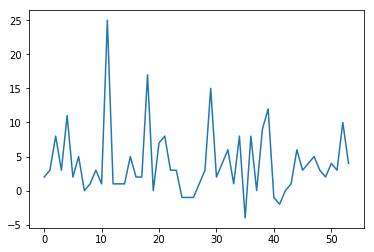

In [153]:
# 피크가 있는 시점이 보인다. 어떤 변수가 피크에 영향을 준걸까?

plt.plot(temp.loc[temp.index[100],:].values)
plt.show()

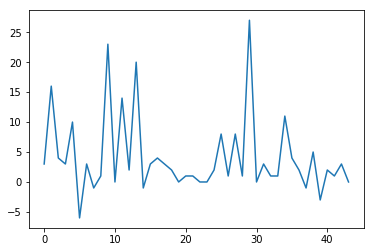

In [155]:
plt.plot(temp.loc[temp.index[1],:].values)
plt.show()

In [13]:
IQR = rawdata.describe().loc["75%",:] - rawdata.describe().loc["25%",:]

In [14]:
lower_bound = rawdata.describe().loc["25%"] - 1.5 * IQR
upper_bound = rawdata.describe().loc["75%"] + 1.5 * IQR

## 4) 선수별 포지션 일람
### 데이터 전처리시 변수별로 *22의 와이드폼으로 펼칠 때, 컬럼을 포지션별로 개별 할당이 가능한지 탐색

In [8]:
rawdata["Position"].unique()

array(['SS', 'DE', 'ILB', 'FS', 'CB', 'DT', 'WR', 'TE', 'T', 'QB', 'RB',
       'G', 'C', 'OLB', 'NT', 'FB', 'MLB', 'LB', 'OT', 'OG', 'HB', 'DB',
       'S', 'DL', 'SAF'], dtype=object)

In [110]:
# (1) 전체 선수들의 수 VS 포지션별 선수들의 수

# 몇몇 선수들은 하나 이상의 포지션을 맡은 것으로 보인다. 12만큼의 중복된 인원이 존재한다.

print("전체 선수들의 수")
print(len(rawdata["DisplayName"].unique()))
print("포지션 별 선수들의 수")
print(len(rawdata.groupby("DisplayName")["Position"].value_counts()))

전체 선수들의 수
2230
포지션 별 선수들의 수
2242


In [10]:
# (2) 중복 포지션을 갖고있는 선수들 골라내기

temp = DataFrame(rawdata.groupby("DisplayName")["Position"].value_counts()).unstack().unstack().unstack()

for i in range(0,len(temp.T)):
    if temp.isnull().iloc[:,i].value_counts()[0] != 1:
        print(temp.iloc[:,i].name)
        print(temp.iloc[:,i].Position.dropna().index.values)

Andre Smith
['LB' 'T']
Brandon Marshall
['ILB' 'WR']
Brandon Williams
['CB' 'DT' 'TE']
Chris Thompson
['RB' 'WR']
Isaiah Johnson
['DB' 'S']
Joe Thomas
['ILB' 'OT']
Kyle Fuller
['C' 'CB']
Marcus Williams
['CB' 'FS']
Michael Bennett
['DE' 'DT']
Michael Thomas
['SS' 'WR']
Nick Williams
['DT' 'WR']


In [11]:
# (3) 경기당 중복 포지션 골라내기
# 선수의 수 = 22명
# 포지션의 수 = 13

rawdata[rawdata["PlayId"] == rawdata["PlayId"][1]]["Position"].value_counts()

# 경기당 한개의 포지션에 여러명이 중복해서 맡을 수 있다.

CB     3
WR     3
DE     3
T      2
SS     2
G      2
ILB    1
TE     1
C      1
QB     1
RB     1
DT     1
FS     1
Name: Position, dtype: int64

# 5) 경기 시작후 선수들의 위치 변화

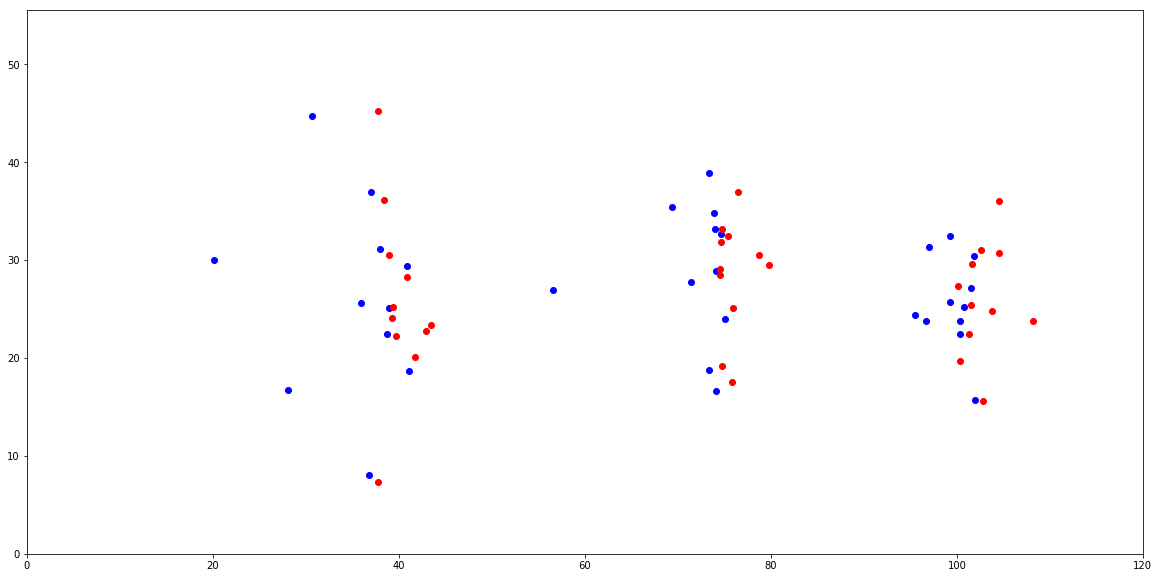

In [25]:
x_away_1 = rawdata[rawdata["PlayId"] == rawdata["PlayId"].unique()[0]][rawdata["Team"] == "away"]["X"]
y_away_1 = rawdata[rawdata["PlayId"] == rawdata["PlayId"].unique()[0]][rawdata["Team"] == "away"]["Y"]

x_home_1 = rawdata[rawdata["PlayId"] == rawdata["PlayId"].unique()[0]][rawdata["Team"] == "home"]["X"]
y_home_1 = rawdata[rawdata["PlayId"] == rawdata["PlayId"].unique()[0]][rawdata["Team"] == "home"]["Y"]

# ======================================================================================================

x_away_2 = rawdata[rawdata["PlayId"] == rawdata["PlayId"].unique()[5]][rawdata["Team"] == "away"]["X"]
y_away_2 = rawdata[rawdata["PlayId"] == rawdata["PlayId"].unique()[5]][rawdata["Team"] == "away"]["Y"]

x_home_2 = rawdata[rawdata["PlayId"] == rawdata["PlayId"].unique()[5]][rawdata["Team"] == "home"]["X"]
y_home_2 = rawdata[rawdata["PlayId"] == rawdata["PlayId"].unique()[5]][rawdata["Team"] == "home"]["Y"]

# =====================================================================================================

x_away_3 = rawdata[rawdata["PlayId"] == rawdata["PlayId"].unique()[10]][rawdata["Team"] == "away"]["X"]
y_away_3 = rawdata[rawdata["PlayId"] == rawdata["PlayId"].unique()[10]][rawdata["Team"] == "away"]["Y"]

x_home_3 = rawdata[rawdata["PlayId"] == rawdata["PlayId"].unique()[10]][rawdata["Team"] == "home"]["X"]
y_home_3 = rawdata[rawdata["PlayId"] == rawdata["PlayId"].unique()[10]][rawdata["Team"] == "home"]["Y"]

plt.figure(figsize=(20,10))

plt.xlim(0,120)
plt.ylim(0,55.5)
# 첫 번째 경기
plt.scatter(x = x_away_1, y = y_away_1,c="b")
plt.scatter(x = x_home_1, y = y_home_1,c="r")
# 두 번째 경기
plt.scatter(x = x_away_2, y = y_away_2,c="b")
plt.scatter(x = x_home_2, y = y_home_2,c="r")
# 세 번째 경기
plt.scatter(x = x_away_3, y = y_away_3, c = "b")
plt.scatter(x = x_home_3, y = y_home_3, c = "r")

plt.show()

# 매 경기마다 시작위치가 달라진다

In [15]:
# 이상치 특징 : 
# 시계열적 특징 : 시계열을 확인해 봤을 때, 추세성은 없지만 스파이크는 존재한다.
# 매 iteration 자체의 특성 = 시작 위치, 속력, 각속도 등..

# 시작 위치와 골라인간의 직선거리(L2 Norm)을 고려(특성 엔지니어링)

# 두 개를 모두 고려한 모델을 생각해보자

# 데이터 전처리 - 카테고리 변수의 변환

# 데이터 전처리 - 결측치 처리

In [16]:
print ("결측치 표시기")
missmap = rawdata.isnull().sum().to_frame().sort_values(0, ascending = False)
missmap[missmap[0] != 0]

결측치 표시기


,0
WindDirection,80234
WindSpeed,67430
Temperature,48532
GameWeather,43648
StadiumType,32934
FieldPosition,6424
Humidity,6160
OffenseFormation,110
DefendersInTheBox,66
Orientation,18


# 데이터 전처리 - 와이드폼 전환

In [70]:
rawdata_cat = rawdata.copy()
rawdata_cat = rawdata_cat.drop(columns="GameId")

In [71]:
rawdata_QB = rawdata_cat[rawdata_cat["Position"] == "QB"].copy()
rawdata_cat = rawdata_cat[rawdata_cat["Position"] != "QB"].copy()

In [49]:
# 왜 22가 나오는거지?

(rawdata_cat.groupby(['PlayId']).cumcount() + 1).value_counts()

11    23171
10    23171
2     23171
3     23171
4     23171
5     23171
6     23171
7     23171
8     23171
9     23171
1     23171
12    23171
13    23171
14    23171
15    23171
16    23171
17    23171
18    23171
19    23171
20    23171
21    23050
22        2
dtype: int64

In [54]:
## 22가 존재하는, 즉 QB가 정상적으로 제거되지 않은 PlayID들

rawdata_cat[rawdata_cat["row_number"] == 22]["PlayId"]

42855     20170924102908
144429    20171112080136
Name: PlayId, dtype: int64

In [128]:
rawdata_cat.loc[0:22,"Position"].value_counts().sort_index()

C      1
CB     3
DE     3
DT     1
FS     1
G      2
ILB    1
RB     1
SS     3
T      2
TE     1
WR     3
Name: Position, dtype: int64

In [129]:
rawdata_cat[rawdata_cat["PlayId"] == 20170924102908]["Position"].value_counts().sort_index()

C      1
CB     2
DE     1
DT     2
FS     1
G      2
LB     1
MLB    2
OLB    1
RB     2
SS     1
T      2
TE     3
WR     1
Name: Position, dtype: int64

In [ ]:
## QB가 존재하는 경우엔 ILB가, 그렇지 않은 경우엔 MLB과 OLB로 구분되어 있다.

In [136]:
rawdata[0:22]["Position"].value_counts().sort_index()

C      1
CB     3
DE     3
DT     1
FS     1
G      2
ILB    1
QB     1
RB     1
SS     2
T      2
TE     1
WR     3
Name: Position, dtype: int64

In [135]:
rawdata[rawdata["PlayId"] == 20170924102908]["Position"].value_counts().sort_index()

C      1
CB     2
DE     1
DT     2
FS     1
G      2
LB     1
MLB    2
OLB    1
RB     2
SS     1
T      2
TE     3
WR     1
Name: Position, dtype: int64

In [72]:
rawdata_cat['row_number'] = rawdata_cat.groupby(['PlayId']).cumcount() + 1

In [73]:
new_df = rawdata_cat.pivot_table(index=['PlayId'], columns=['row_number'], values=rawdata_cat.columns)

In [ ]:
## modeling
## 우선 22개 행의 변수들을 하나의 행인 WideForm으로 만든다
## 즉, 하나의 변수당 22개의 열들이 생긴다(X_1, X_2....X_22, Y_1,y_2,....Y_22 등)

In [75]:
new_df.head()

A                                                                                                                             DefendersInTheBox                                                                                                             Dir                                                                                                                                                                       Dis                                                                                                                             Distance                                                                                                                             Down                                                                                                         HomeScoreBeforePlay                                                                                                         Humidity                                                        \
row_number        1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21  22                1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21  22      1       2       3       4       5       6       7       8       9       10      11      12      13      14      15      16      17      18      19      20      21  22    1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21  22       1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21  22   1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21  22                  1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21  22       1     2     3     4     5     6     7     8     9     10   
PlayId                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
20170907000118  1.13  1.35  0.59  0.54  2.43  0.32  0.83  0.74  1.86  0.76  0.73  1.39  0.82  1.36  0.80  0.77  1.48  3.35  1.51  0.69  1.55 NaN               6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0 NaN  177.18  198.70  202.73  105.64  164.31   95.01  322.59  270.04   55.31  190.84  274.14  284.15  215.90  222.76  198.55  195.09  278.52  245.74  267.32  242.05  255.67 NaN  0.40  0.01  0.31  0.02  0.16  0.18  0.02  0.13  0.28  0.51  0.01  0.55  0.19  0.32  0.19  0.59  0.51  0.38  0.17  0.22  0.24 NaN      2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0 NaN  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0 NaN                 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 NaN     77.0  77.0  77.0  77.0  77.0  77.0  77.0  77.0  77.0  77.0   
20170907000139 

## 모델링 : XGBOOST

## 모델링 : Neural Net

## 모델링 : LSTM